# Assignement - 3

### N CHIRU SANDEEP

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
data = pd.read_csv("/Users/chirusandeep/Movies/Document/datasets/Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
data.shape

(891, 12)

Checking for null values

In [5]:
null_counts = data.isnull().sum()
null_counts

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Data visualization

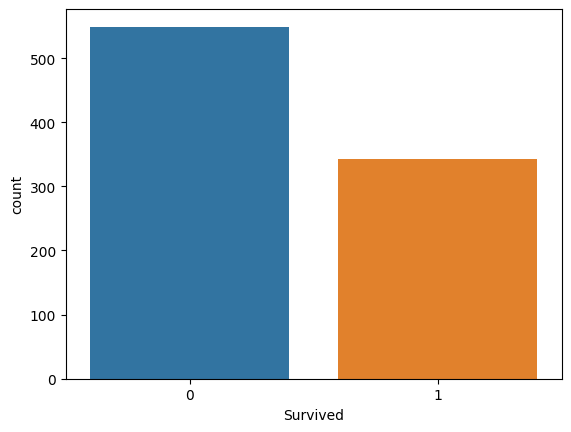

In [6]:
sns.countplot(x='Survived', data=data)
plt.show()

Outlier detection

In [17]:
Q1 = data[['Age', 'Fare']].quantile(0.25)
Q3 = data[['Age', 'Fare']].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((data[['Age', 'Fare']] < lower_bound) | (data[['Age', 'Fare']] > upper_bound)).any(axis=1)
data_no_outliers = data[~outliers]


In [21]:
from scipy import stats

z_scores = np.abs(stats.zscore(data[['Age', 'Fare']]))

threshold = 3

outliers = (z_scores > threshold).any(axis=1)
data_no_outliers = data[~outliers]

outliers


0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [22]:
data_no_outliers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Splitting dependent and independent variable

In [7]:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [8]:
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

Encoding

In [14]:
le = LabelEncoder()
X['Sex'] = le.fit_transform(X['Sex'])
X['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

Feature scaling

In [15]:
scaler = StandardScaler()
X[['Age', 'Fare']] = scaler.fit_transform(X[['Age', 'Fare']])
X[['Age', 'Fare']]


,Age,Fare
0,-0.530377,-0.502445
1,0.571831,0.786845
2,-0.254825,-0.488854
3,0.365167,0.420730
4,0.365167,-0.486337
...,...,...
886,-0.185937,-0.386671
887,-0.737041,-0.044381
888,NaN,-0.176263
889,-0.254825,-0.044381


Splitting data into train and test sets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
X_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
331,332,1,"Partner, Mr. Austen",1,1.088491,0,0,113043,-0.074583,C124,S
733,734,2,"Berriman, Mr. William John",1,-0.461489,0,0,28425,-0.386671,NaN,S
382,383,3,"Tikkanen, Mr. Juho",1,0.158503,0,0,STON/O 2. 3101293,-0.488854,NaN,S
704,705,3,"Hansen, Mr. Henrik Juul",1,-0.254825,1,0,350025,-0.490280,NaN,S
813,814,3,"Andersson, Miss. Ebba Iris Alfrida",0,-1.632584,4,2,347082,-0.018709,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
106,107,3,"Salkjelsvik, Miss. Anna Kristine",0,-0.599265,0,0,343120,-0.494391,NaN,S
270,271,1,"Cairns, Mr. Alexander",1,NaN,0,0,113798,-0.024246,NaN,S
860,861,3,"Hansen, Mr. Claus Peter",1,0.778495,2,0,350026,-0.364355,NaN,S
435,436,1,"Carter, Miss. Lucile Polk",0,-1.081480,1,2,113760,1.767741,B96 B98,S


In [24]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

In [25]:
X_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
709,710,3,"Moubarek, Master. Halim Gonios (""William George"")",1,NaN,1,1,2661,-0.341452,NaN,C
439,440,2,"Kvillner, Mr. Johan Henrik Johannesson",1,0.089615,0,0,C.A. 18723,-0.437007,NaN,S
840,841,3,"Alhomaki, Mr. Ilmari Rudolf",1,-0.668153,0,0,SOTON/O2 3101287,-0.488854,NaN,S
720,721,2,"Harper, Miss. Annie Jessie ""Nina""",0,-1.632584,0,1,248727,0.016023,NaN,S
39,40,3,"Nicola-Yarred, Miss. Jamila",0,-1.081480,1,0,2651,-0.422074,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...
433,434,3,"Kallio, Mr. Nikolai Erland",1,-0.874817,0,0,STON/O 2. 3101274,-0.504962,NaN,S
773,774,3,"Elias, Mr. Dibo",1,NaN,0,0,2674,-0.502949,NaN,C
25,26,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",0,0.571831,1,5,347077,-0.016444,NaN,S
84,85,2,"Ilett, Miss. Bertha",0,-0.874817,0,0,SO/C 14885,-0.437007,NaN,S


In [26]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64